In [11]:
import cv2
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
images_folder = "/mnt/storage_4tb/ymi/spacenet/data/train/Atlanta_nadir53_catid_1030010003193D00/jpegs_fine"
masks_folder = images_folder.replace("jpegs_fine", "masks")
results_folder = images_folder.replace("jpegs_fine", "results_resize")
out_folder = images_folder.replace("jpegs_fine", "debug")

In [8]:
filename = os.listdir(images_folder)[0]
print(filename)

8bit_Atlanta_nadir53_catid_1030010003193D00_737201_3741339.jpg


In [27]:
file_path = os.path.join(images_folder, filename)
mask_path = os.path.join(masks_folder, filename.replace(".jpg",".tif").replace("8bit_Atlanta_nadir53_catid_1030010003193D00","mask"))
res_path = os.path.join(results_folder, filename.replace(".jpg", ".png"))

/mnt/storage_4tb/ymi/spacenet/data/train/Atlanta_nadir53_catid_1030010003193D00/results_resize/8bit_Atlanta_nadir53_catid_1030010003193D00_737201_3741339.png


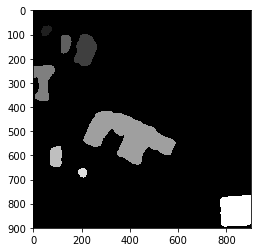

In [28]:
img = cv2.imread(file_path)
mask = cv2.imread(mask_path)
#print(mask)
res = cv2.imread(res_path)
#print(res_path)
plt.imshow(img)
plt.imshow(mask)
plt.imshow(res)

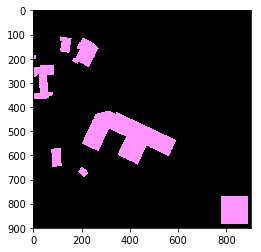

In [64]:
mask = cv2.imread(mask_path)
mask[:,:,1][mask[:,:,1] > 1] = 150
plt.imshow(mask)

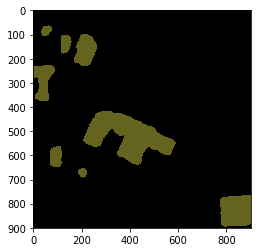

In [58]:
res = cv2.imread(res_path)
res[:,:,0][res[:,:,0] > 1] = 100
res[:,:,1][res[:,:,1] > 1] = 100
res[:,:,2][res[:,:,2] > 1] = 30
plt.imshow(res)

In [54]:
res.max()

200

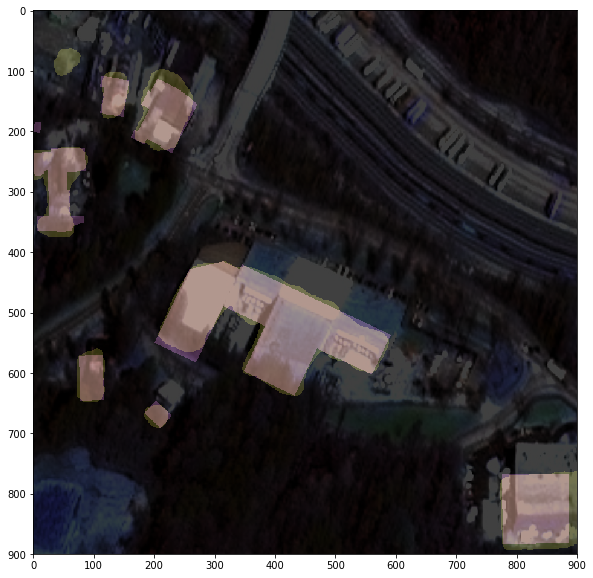

In [67]:
alpha = 0.5
beta = (1.0 - alpha)
dst = cv2.addWeighted(img, alpha, mask, beta, 0.0)
dst_2 = cv2.addWeighted(dst, alpha, res, beta, 0.0)
plt.figure(figsize=(10,10))
plt.imshow(dst_2)

In [70]:
filenames = os.listdir(images_folder)
os.makedirs(out_folder, exist_ok=True)
for filename in filenames:
    file_path = os.path.join(images_folder, filename)
    mask_path = os.path.join(masks_folder, filename.replace(".jpg",".tif").replace("8bit_Atlanta_nadir53_catid_1030010003193D00","mask"))
    res_path = os.path.join(results_folder, filename.replace(".jpg", ".png"))
    out_path = os.path.join(out_folder, filename)
    img = cv2.imread(file_path)
    res = cv2.imread(res_path)
    res[:,:,0][res[:,:,0] > 1] = 100
    res[:,:,1][res[:,:,1] > 1] = 100
    res[:,:,2][res[:,:,2] > 1] = 30
    mask = cv2.imread(mask_path)
    mask[:,:,1][mask[:,:,1] > 1] = 150
    alpha = 0.5
    beta = (1.0 - alpha)
    dst = cv2.addWeighted(img, alpha, mask, beta, 0.0)
    dst_2 = cv2.addWeighted(dst, alpha, res, beta, 0.0)
    cv2.imwrite(out_path, dst_2)

In [29]:
#visMask = (mask * 255).astype("uint8")
instance = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(instance)
# show the extracted ROI, the mask, along with the
# segmented instance
# cv2.imshow("ROI", roi)
# cv2.imshow("Mask", visMask)
# cv2.imshow("Segmented", instance)

error: OpenCV(3.4.1) /io/opencv/modules/core/src/arithm.cpp:241: error: (-215) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function binary_op
